In [4]:
# import statements from outside python packages
import os
import numpy as np
import matplotlib.pyplot as plt
# import from the detmap submodule
from sodetlib.detmap.makemap import MapMaker
from sodetlib.detmap.simple_csv import read_csv
from sodetlib.detmap.meta_select import abs_path_detmap
from sodetlib.detmap.example.download_example_data import sample_data_init

# Global Settings for all UFMs in this Demonstration
While each Array's analysis can be individually configured, this example runs all the analysis as a comparable batch, pointing to a single output directory.

In [5]:
dir_this_file = os.path.dirname(os.path.abspath(''))
# options for all record types.
output_parent_dir = os.path.join(dir_this_file, 'output')
do_csv_output = True
overwrite_csv_output = False
show_layout_plot = False
save_layout_plot = True
overwrite_plot = False
mapping_strategy = 'map_by_freq'
verbose = True

# options for psat plot (Mv6) example only.
psat_temp_k = 9.0
psat_show_plot = False
psat_save_plot = True

# Per-Array Settings
The arrays, the test conditions under which they are characterized, and the associated data input files require individual curation.

In [6]:
# where the sample data dir is located on the local machine
abs_path_sample_data = os.path.join(abs_path_detmap, 'sample_data')
sample_data_init(del_dir=False)

# The correct (and available) settings for individual arrays.
mv6_record = dict(north_is_highband=False, array_name='Mv6',
                  tunefile_path=os.path.join(abs_path_sample_data, '1632247315_tune.npy'),
                  dark_bias_lines=[4, 5, 6, 7, 8, 9, 10, 11],
                  vna_shift_mhz=10.0,
                  tune_data_vna_intermediate_filename=os.path.join(abs_path_sample_data, 'tune_data_vna.csv'),
                  path_north_side_vna=os.path.join(abs_path_sample_data, 'north_side_vna_farray.csv'),
                  path_south_side_vna=os.path.join(abs_path_sample_data, 'south_side_vna_farray.csv'),
                  cold_ramp_file=os.path.join(abs_path_sample_data, 'coldloadramp_example.csv'))

sv5_record = dict(north_is_highband=True, array_name='Sv5',
                  timestream_path=os.path.join(abs_path_sample_data, 'freq_map.npy'),
                  tunefile_path=os.path.join(abs_path_sample_data, '1619048156_tune.npy'))

cv4_record = dict(north_is_highband=False, array_name='cv4',
                  tunefile_path=os.path.join(abs_path_sample_data, '1628891659_tune.npy'))

## MV6
This example utilizes a large number of features and does additional analysis compared to subsequent arrays. It is an example of the breath of options in this submodule, but is not the recommended place for a user to start and to make a first mapping.

This example makes an output from a SMuRF tunefile, an array of frequencies measured from a VNA, and also goes an additional step to ready in and mapp cold load measurements, making a Power of Saturation (Psat) map. The input Psat mapping data is organized by hand. a bad long term solution, reach out for an upgrade if you intend on making this map type.

Metadata files for the 'Mv6' array localed in the directory: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/meta
  Resonator Design         : umux_32_map.pkl
  Detector Layout          : copper_map_corrected.csv
  mux-band to mux-position : Mv6_mux_pos_num_to_mux_band_num.csv
SMuRF-band:0  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:2  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:3  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:4  Making One-to-One refit and mapping
  2 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: [4484.692153423016, 4495.962905555661]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
 2 measured frequencies u

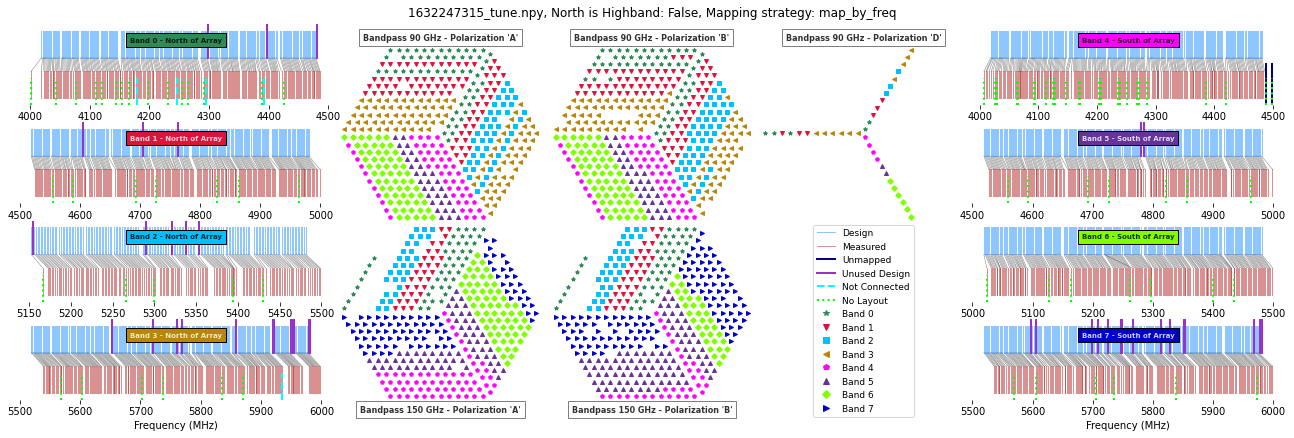

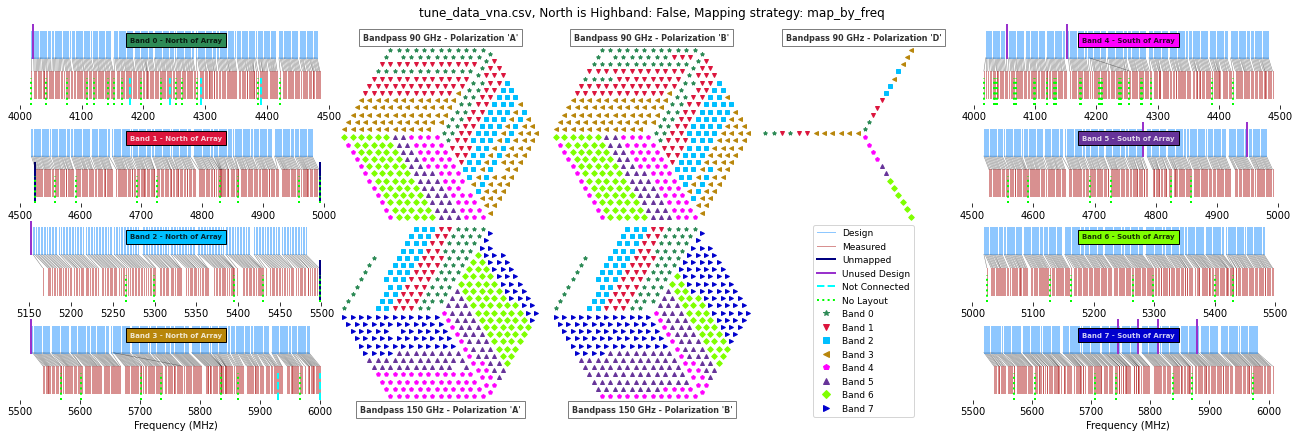

In [7]:

mv6_map_maker = MapMaker(north_is_highband=mv6_record['north_is_highband'],
                         array_name=mv6_record['array_name'],
                         mapping_strategy=mapping_strategy, dark_bias_lines=mv6_record['dark_bias_lines'],
                         do_csv_output=do_csv_output, overwrite_csv_output=overwrite_csv_output,
                         show_layout_plot=show_layout_plot, save_layout_plot=save_layout_plot,
                         overwrite_plot=overwrite_plot,
                         output_parent_dir=output_parent_dir,
                         verbose=verbose)

mv6_smurf_map = mv6_map_maker.make_map_smurf(tunefile=mv6_record['tunefile_path'])
mv6_map_maker.psat_map(tune_data=mv6_smurf_map, cold_ramp_file=mv6_record['cold_ramp_file'],
                       temp_k=psat_temp_k, show_plot=psat_show_plot, save_plot=psat_save_plot)
mv6_vna_map = mv6_map_maker.make_map_vna(tune_data_vna_intermediate_filename=mv6_record['tune_data_vna_intermediate_filename'],
                                         path_north_side_vna=mv6_record['path_north_side_vna'],
                                         path_south_side_vna=mv6_record['path_south_side_vna'],
                                         shift_mhz=mv6_record['vna_shift_mhz'])

## Sv5
An older array that is the only one to use the meta/UFM_Si_corrected.csv metadata. This example also includes input from a g3stream file in addtion to the standard SMuRF tunefile.

Metadata files for the 'Sv5' array localed in the directory: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/meta
  Resonator Design         : umux_32_map.pkl
  Detector Layout          : UFM_Si_corrected.csv
  mux-band to mux-position : Sv5_mux_pos_num_to_mux_band_num.csv
SMuRF-band:0  Making One-to-One refit and mapping
  42 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: []
   left overrun: [4068.895497448643, 4071.593398660979, 4074.1678534709786, 4076.2624601686734, 4077.966816949308, 4079.0061560141335, 4083.8444585572884, 4086.440815148349, 4088.32436831947, 4090.2517250527103, 4090.944617762594, 4091.9341800522843, 4093.3418672531125, 4103.257400860072, 4105.226570084426, 4107.506346385625, 4109.710461988619, 4112.428273911008, 4114.903175170736, 4117.459710341688, 4119.886825897287]
  Doing overrun healing...
  Overrun healing complete.
 15 measured frequencies unmapped (more measured then design): [4068.895497448643, 4071.593398660979, 4074.16

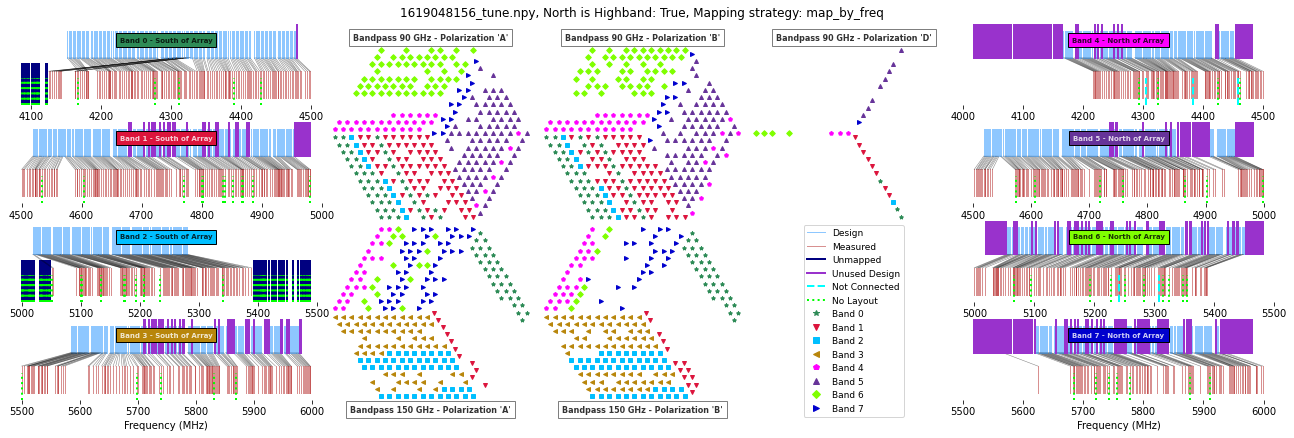

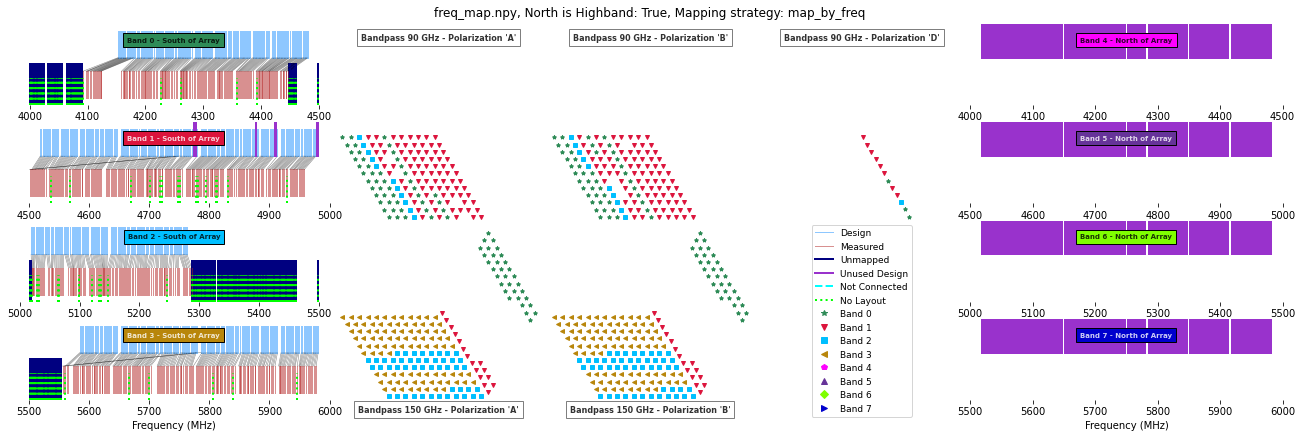

In [8]:
sv5_map_maker = MapMaker(north_is_highband=sv5_record['north_is_highband'],
                         array_name=sv5_record['array_name'],
                         mapping_strategy=mapping_strategy, dark_bias_lines=None,
                         do_csv_output=do_csv_output, overwrite_csv_output=overwrite_csv_output,
                         show_layout_plot=show_layout_plot, save_layout_plot=save_layout_plot,
                         overwrite_plot=overwrite_plot,
                         output_parent_dir=output_parent_dir,
                         verbose=verbose)
sv5_smurf_map = sv5_map_maker.make_map_smurf(tunefile=sv5_record['tunefile_path'])
sv5_g3_map = sv5_map_maker.make_map_g3_timestream(timestream=sv5_record['timestream_path'])

## Cv4
This data has a corresponding beam map measurements, not shown here (yet).

Metadata files for the 'cv4' array localed in the directory: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/meta
  Resonator Design         : umux_32_map.pkl
  Detector Layout          : copper_map_corrected.csv
  mux-band to mux-position : Mv4_mux_pos_num_to_mux_band_num.csv
SMuRF-band:0  Making One-to-One refit and mapping
  1 outlier(s) are more than 10.0 MHz from a design value.
  right overrun: [4469.61483788425, 4471.274220607674, 4472.965399886277, 4474.982493855468, 4476.987664116468, 4479.008732655058, 4517.397111180069]
   left overrun: []
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:1  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
  right overrun: []
   left overrun: [4519.544967812516, 4521.641457199988]
  Doing overrun healing...
  Overrun healing complete.
SMuRF-band:2  Making One-to-One refit and mapping
  No outliers that are more than 10.0 MHz from a design value.
SMuRF-band:3  Making O

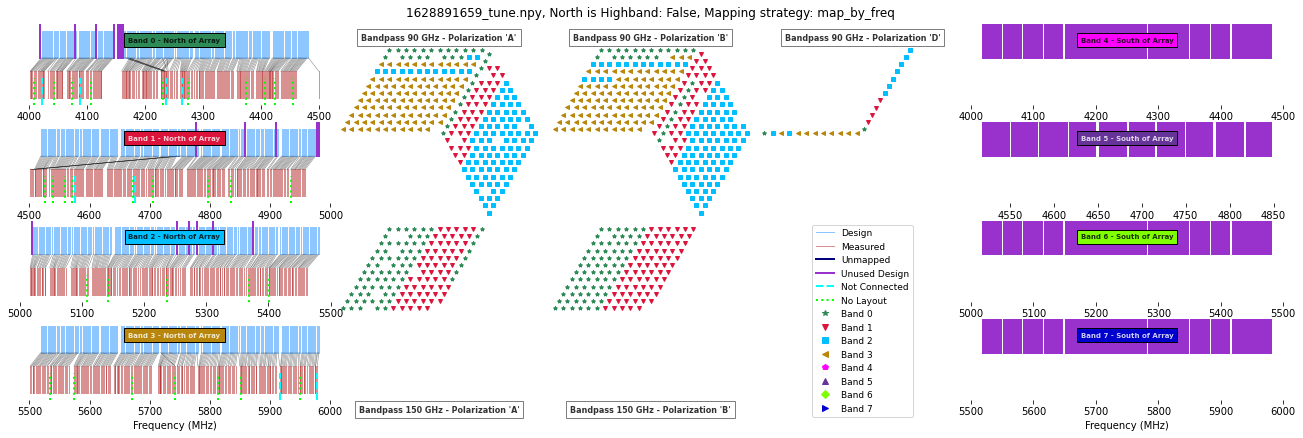

In [9]:
cv4_map_maker = MapMaker(north_is_highband=cv4_record['north_is_highband'],
                         array_name=cv4_record['array_name'],
                         mapping_strategy=mapping_strategy, dark_bias_lines=None,
                         do_csv_output=do_csv_output, overwrite_csv_output=overwrite_csv_output,
                         show_layout_plot=show_layout_plot, save_layout_plot=save_layout_plot,
                         overwrite_plot=overwrite_plot,
                         output_parent_dir=output_parent_dir,
                         verbose=verbose)
cv4_smurf_map = cv4_map_maker.make_map_smurf(tunefile=cv4_record['tunefile_path'])

# Iteration over Instances of `OperateTuneData()`
In this example notebook, these are all the objects returned by `MapMaker()`, denote as variables with the suffix `_map`

In [10]:
# if you like to work with rectangular data topologies, it is easy to cast the data into an iterable like a list
data_list = list(mv6_smurf_map)
# and then into a numpy array
data_array = np.array(data_list)

# Read in the CSV Output files
There is no need to keep re-running the analysis and mapping. Users can simply read in the form the output CSV of results to use all the methods of the `OperateTuneData()` class.

Metadata files for the 'mv6' array localed in the directory: /Users/cwheeler/PycharmProjects/sodetlib/sodetlib/detmap/meta
  Resonator Design         : umux_32_map.pkl
  Detector Layout          : copper_map_corrected.csv
  mux-band to mux-position : Mv6_mux_pos_num_to_mux_band_num.csv


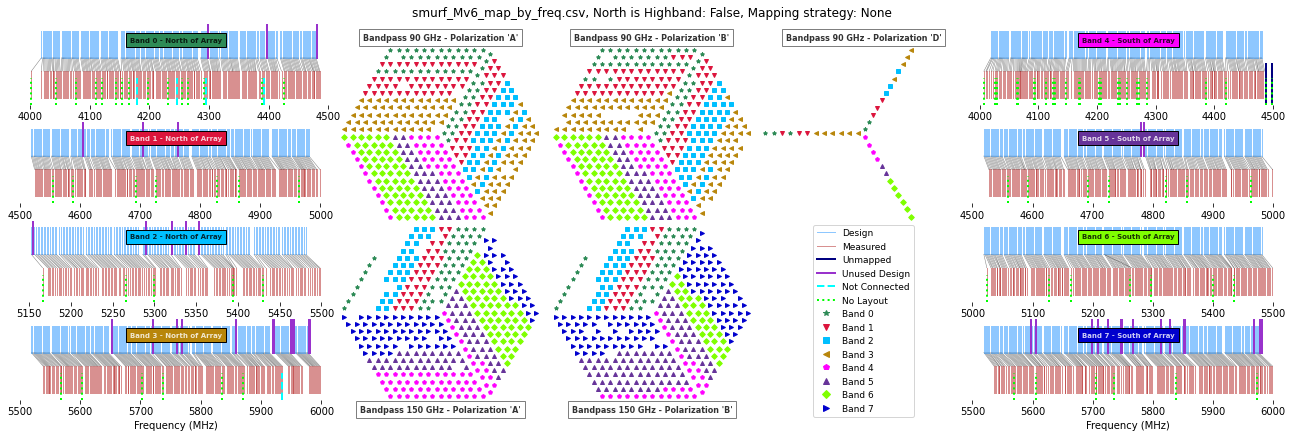

In [11]:
# use os.path.join() to create directory paths that also work on Windows.
dir_mv6_smurf_results = os.path.join(output_parent_dir, 'smurf_Mv6')
dir_mv6_smurf_plot = os.path.join(dir_mv6_smurf_results, 'plot')
filename_mv6_smurf_results = 'smurf_Mv6_map_by_freq.csv'
path_sv5_smurf_results = os.path.join(dir_mv6_smurf_results, filename_mv6_smurf_results)
# use the output data to plot a results
mv6_map_maker_from_output = MapMaker(output_parent_dir=output_parent_dir, array_name='mv6',
                                     from_output_csv=path_sv5_smurf_results)
operate_tune_data_mv6 = mv6_map_maker_from_output.load_from_output_csv()
operate_tune_data_mv6.plot_with_layout(plot_dir=dir_mv6_smurf_plot,
                                       overwrite_plot=True, show_plot=True, save_plot=False)

# Simpler Output Read-in
If you do not care to use the method in the OperateTuneData() class, you can simply read in the output CSV.

In [12]:
# to simply read-in the output data and it over it, use the csv reader inside this module
data_by_column, data_by_row = read_csv(path=path_sv5_smurf_results)

## A Filtering Example
For Users working with the simpler output data read-in.

In [13]:
# use the iterated data to make your own filters
bandpass_selection = 150  # integer (GHz) either 90 or 150
polarization_selection = 'A'  # options are 'A', 'B', 'D' for 90 GHz 'A' or 'B' for 150 GHz

det_x_all_not_connect_pixels = []
det_y_all_not_connect_pixels = []
det_x_single_bandpass_and_pol = []
det_y_single_bandpass_and_pol = []
for single_data_row in data_by_row:
    if single_data_row['bandpass'] == bandpass_selection and single_data_row['pol'] == polarization_selection:
        det_x_single_bandpass_and_pol.append(single_data_row['det_x'])
        det_y_single_bandpass_and_pol.append(single_data_row['det_y'])
    if single_data_row['bandpass'] == 'NC':
        det_x_all_not_connect_pixels.append(single_data_row['det_x'])
        det_y_all_not_connect_pixels.append(single_data_row['det_y'])


## Plot Example
from simpler output data read-in

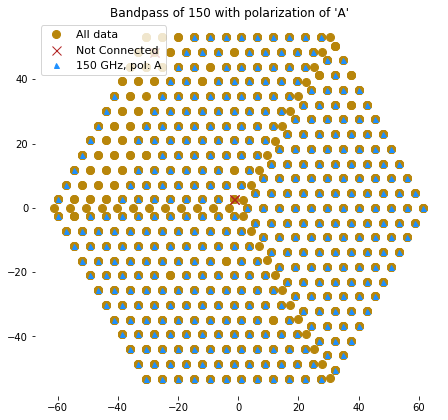

In [14]:
# figure coordinates
left = 0.05
bottom = 0.08
right = 0.99
top = 0.95

# define the figure size in inches
fig = plt.figure(figsize=(6, 6))

# set the axes boundaries in terms of figure coordinates
coord_ax = [left, bottom, right-left, top - bottom]
# make a new axes for plotting in this figure
ax = fig.add_axes(coord_ax, frameon=False)

# plot the data
ax.plot(data_by_column['det_x'], data_by_column['det_y'], ls='None', marker='o', color='darkgoldenrod', label="All data", markersize=8)
ax.plot(det_x_all_not_connect_pixels, det_y_all_not_connect_pixels, ls='None', marker='x', color='firebrick', label="Not Connected",  markersize=9)
ax.plot(det_x_single_bandpass_and_pol, det_y_single_bandpass_and_pol, ls='None', marker='^', color='dodgerblue',  markersize=5,
        label=f"{bandpass_selection} GHz, pol: {polarization_selection}")
# add a title for the whole plot
fig.suptitle(f"Bandpass of {bandpass_selection} with polarization of '{polarization_selection}'")
# add a legend
ax.legend(loc='best', fontsize=11)
# show the figure
plt.show()